***

<center><u><H1>Simulazione numerica</H1></u></center>

***

Riproduzione del comportamento di un sistema tramite simulazione al computer per ottenere le uscite di un modello matematico associato a tale sistema.

- Sviluppata nel 1940 nei laboratori di Los Alamos dagli scienziati che lavoravano al progetto delle armi nucleari (Fermi, Von Neumann, Ulman, etc.)
- Una trattazione analitica non era sempre praticabile, per cui era necessario trovare una soluzione alternativa


Il metodo Monte Carlo si basa sulla definizione di probabilità come frequenza relativa degli eventi:

$$
  P = \lim_{N_t \rightarrow \infty} \frac{N_e}{N_t}
$$

dove $N_t$ è il numero di test condotti e $N_e$ il numero di eventi misurati.

Come esercizio di base, proviamo ad simulare il lancio di un dado:

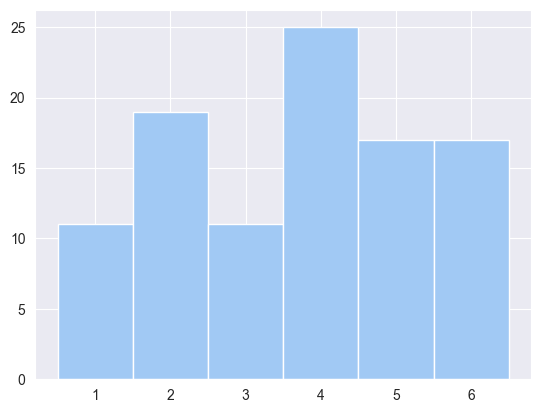

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)  # inizializzazione del seed per riproducibilità

sns.set_palette('pastel')

# definiamo il numero di iterazioni e inizializziamo un array vuoto
n_mc_iterations = 100
results = np.empty([n_mc_iterations,1])

# ciclo per ottenere i lanci del dado: si potrebbe creare un array con questa dimensione,
# ma rendiamo esplicita la simulazione anche se con un modo meno efficiente
for i in range(n_mc_iterations):
    results[i] = np.random.randint(1, 7)

plt.hist(results, bins=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5])
plt.show()



Chiaramente non siamo ancora andati a convergenza con i risultati: abbiamo troppe poche iterazioni nel ciclo Monte Carlo. Proviamo ad aumentarli:

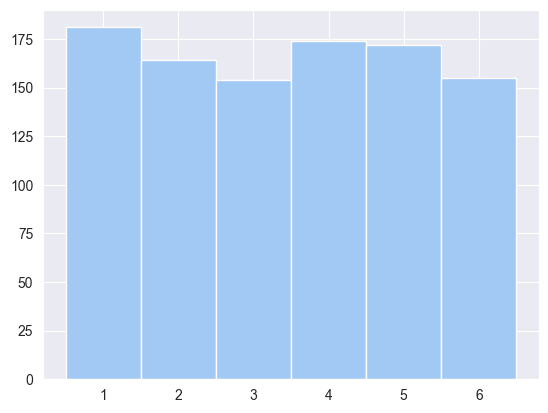

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)  # inizializzazione del seed per riproducibilità

sns.set_palette('pastel')

# definiamo il numero di iterazioni e inizializziamo un array vuoto
n_mc_iterations = 1000
results = np.empty([n_mc_iterations,1])

# ciclo per ottenere i lanci del dado: si potrebbe creare un array con questa dimensione,
# ma rendiamo esplicita la simulazione anche se con un modo meno efficiente
for i in range(n_mc_iterations):
    results[i] = np.random.randint(1, 7)

plt.hist(results, bins=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5])
plt.show()

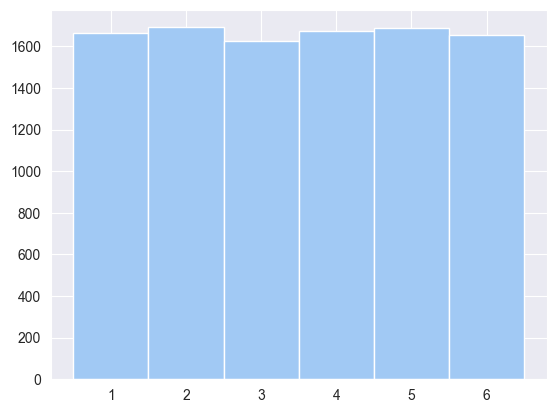

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)  # inizializzazione del seed per riproducibilità

sns.set_palette('pastel')

# definiamo il numero di iterazioni e inizializziamo un array vuoto
n_mc_iterations = 10000
results = np.empty([n_mc_iterations,1])

# ciclo per ottenere i lanci del dado: si potrebbe creare un array con questa dimensione,
# ma rendiamo esplicita la simulazione anche se con un modo meno efficiente
for i in range(n_mc_iterations):
    results[i] = np.random.randint(1, 7)

plt.hist(results, bins=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5])
plt.show()

Iniziamo a vedere una distribuzione effettivamente uniforme: abbiamo effettuato un numero sufficiente di test per garantire che la frequenza relativa degli esperimenti tenda alla loro probabilità.

Un altro esempio: calcoliamo l'attenuazione media di un segnale su un canale soggetto a shadowing, considerando un'area di copertura di 1500 metri e utenti distribuiti uniformemente.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)  # inizializzazione del seed per riproducibilità

sns.set_palette('pastel')

Per questo scopo, abbiamo bisogno di:
- definire il valore della deviazione standard dello shadowing
- definire la frequenza della portante
- distribuire gli utenti uniformemente con una data densità.

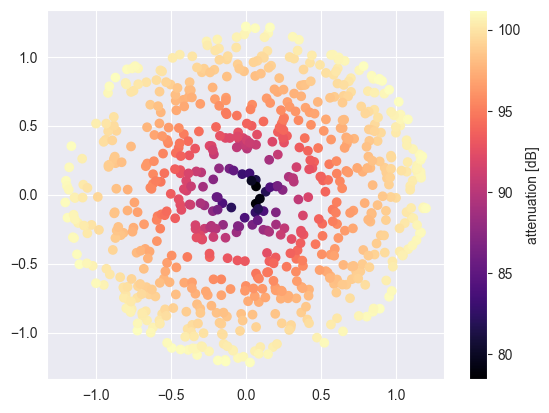

In [3]:
shad_std_db = 0  # deviazione standard in dB
n_mc_iterations = 10  # iterazioni Monte Carlo
user_density_km2 = 15  # utenti per km quadrato
max_radius = 1.5  # raggio di copertura in km
frequency = 2_000  # frequenza in MHz

attenuation_db = np.array([])

x = np.array([])
y = np.array([])

# gli utenti vanno distribuiti unifirmemente ad ogni iterazione
for i in range(n_mc_iterations):
    # distribuiamo gli utenti
    n_users = int(np.round(user_density_km2 * np.pi * max_radius))
    angles = np.random.uniform(0, 2 * np.pi, size=n_users)
    radius = max_radius*np.sqrt(np.random.uniform(0.001, 1.0, size=n_users))
    user_x = radius * np.cos(angles)
    x = np.append(user_x, x)
    user_y = radius * np.sin(angles)
    y = np.append(user_y, y)
    distance = np.sqrt(user_x ** 2 + user_y ** 2)
    attenuation_db = np.append(20 * np.log10(distance) + 20 * np.log10(frequency) +
                               32.45 + np.random.lognormal(sigma=shad_std_db), attenuation_db)

plt.scatter(x, y, c=attenuation_db, cmap='magma')
cbar = plt.colorbar()
cbar.set_label('attenuation [dB]')
plt.show()